# K Nearest Neighbors with Python



## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data


In [2]:
df = pd.read_csv("iris_data.csv",encoding="latin-1")

In [3]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.3,3.0,1.1,0.1,I. setosa
1,4.4,2.9,1.4,0.2,I. setosa
2,4.4,3.0,1.3,0.2,I. setosa
3,4.4,3.2,1.3,0.2,I. setosa
4,4.5,2.3,1.3,0.3,I. setosa


In [4]:
data = pd.DataFrame({'Max': df.head().max(), 'Min': df.head().min()})
data

,Max,Min
Sepal length,4.5,4.3
Sepal width,3.2,2.3
Petal length,1.4,1.1
Petal width,0.3,0.1
Species,I. setosa,I. setosa


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('Species',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('Species',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Sepal length,Sepal width,Petal length,Petal width
0,-1.870024,-0.131979,-1.510739,-1.444450
1,-1.748856,-0.362176,-1.340227,-1.312977
2,-1.748856,-0.131979,-1.397064,-1.312977
3,-1.748856,0.328414,-1.397064,-1.312977
4,-1.627688,-1.743357,-1.397064,-1.181504


In [10]:
data = pd.DataFrame({'Max': df_feat.head().max(), 'Min': df_feat.head().min()})
data

,Max,Min
Sepal length,-1.627688,-1.870024
Sepal width,0.328414,-1.743357
Petal length,-1.340227,-1.510739
Petal width,-1.181504,-1.444450


## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Species'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 15  2]
 [ 0  1 14]]


In [19]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

    I. setosa       1.00      1.00      1.00        13
I. versicolor       0.94      0.88      0.91        17
 I. virginica       0.88      0.93      0.90        15

     accuracy                           0.93        45
    macro avg       0.94      0.94      0.94        45
 weighted avg       0.93      0.93      0.93        45



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [20]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

Here we can see that after around K=5 the error rate just tends to hover around 0.06-0.08 Let's retrain the model with that and check the classification report!

WITH K=1


[[11  0  0]
 [ 0 14  0]
 [ 0  1 19]]


               precision    recall  f1-score   support

    I.�setosa       1.00      1.00      1.00        11
I.�versicolor       0.93      1.00      0.97        14
 I.�virginica       1.00      0.95      0.97        20

     accuracy                           0.98        45
    macro avg       0.98      0.98      0.98        45
 weighted avg       0.98      0.98      0.98        45



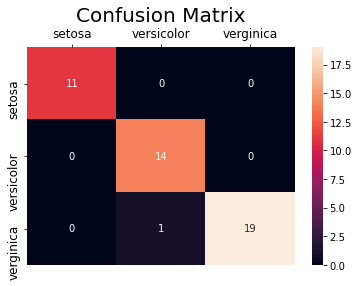

In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
plt.show()

WITH K=2


[[11  0  0]
 [ 0 14  0]
 [ 0  3 17]]


               precision    recall  f1-score   support

    I.�setosa       1.00      1.00      1.00        11
I.�versicolor       0.82      1.00      0.90        14
 I.�virginica       1.00      0.85      0.92        20

     accuracy                           0.93        45
    macro avg       0.94      0.95      0.94        45
 weighted avg       0.95      0.93      0.93        45



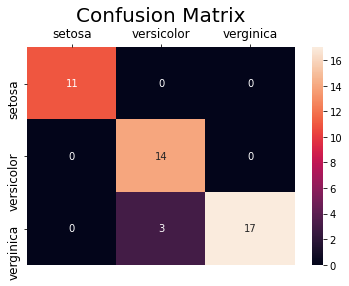

In [23]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
plt.show()

WITH K=5


[[11  0  0]
 [ 0 14  0]
 [ 0  2 18]]


               precision    recall  f1-score   support

    I.�setosa       1.00      1.00      1.00        11
I.�versicolor       0.88      1.00      0.93        14
 I.�virginica       1.00      0.90      0.95        20

     accuracy                           0.96        45
    macro avg       0.96      0.97      0.96        45
 weighted avg       0.96      0.96      0.96        45



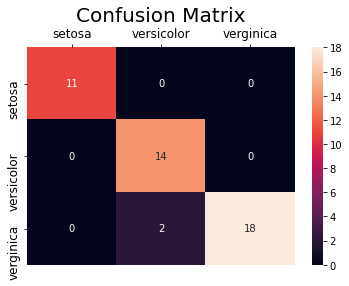

In [24]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
plt.show()

WITH K=5


[[11  0  0]
 [ 0 14  0]
 [ 0  4 16]]


               precision    recall  f1-score   support

    I.�setosa       1.00      1.00      1.00        11
I.�versicolor       0.78      1.00      0.88        14
 I.�virginica       1.00      0.80      0.89        20

     accuracy                           0.91        45
    macro avg       0.93      0.93      0.92        45
 weighted avg       0.93      0.91      0.91        45



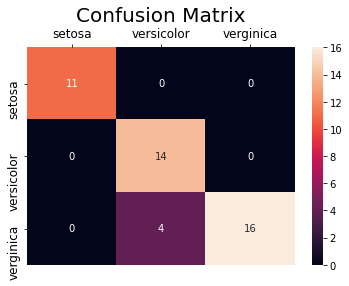

In [25]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
plt.show()

WITH K=30


[[11  0  0]
 [ 0 14  0]
 [ 0  7 13]]


               precision    recall  f1-score   support

    I.�setosa       1.00      1.00      1.00        11
I.�versicolor       0.67      1.00      0.80        14
 I.�virginica       1.00      0.65      0.79        20

     accuracy                           0.84        45
    macro avg       0.89      0.88      0.86        45
 weighted avg       0.90      0.84      0.84        45



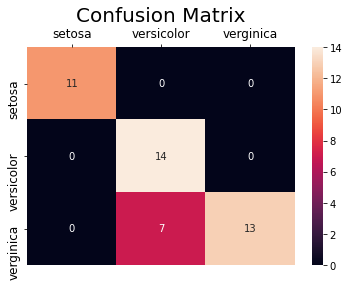

In [26]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['setosa', 'versicolor','verginica'], fontsize = 12)
plt.show()